# Plotting performance of denoisining techniques
Here, plot the results of all denoising techniques.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#history=np.load('my_history.npy',allow_pickle='TRUE').item()
#print(history)

In [2]:
## Plot Losses

In [3]:
unsupervised_valid_loss = []
supervised_valid_loss = []
for i in range((50)):
    unsupervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_' + str(i) + '.npy'))
    supervised_valid_loss.append(np.load('./epoch_' + str(i) + '/valid_loss_sup_' + str(i) + '.npy'))

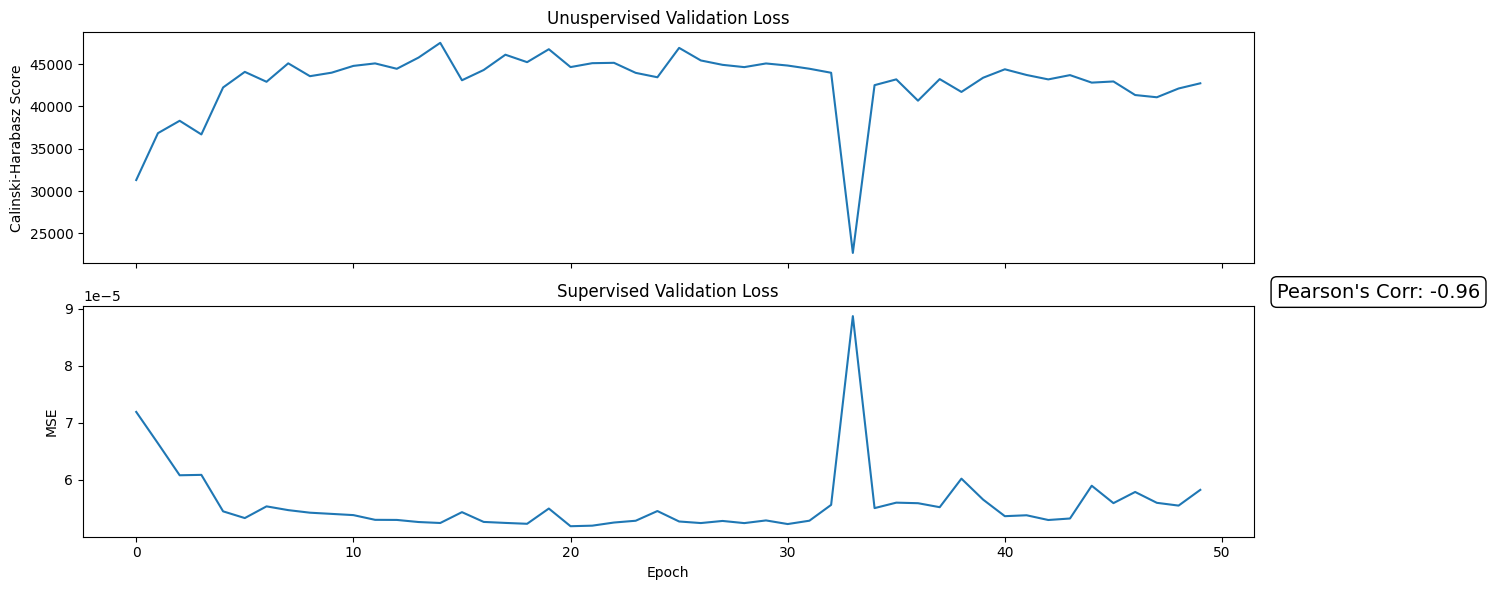

In [4]:
fig, ax = plt.subplots(2,sharex=True,figsize=(15, 6))

ax[0].plot(unsupervised_valid_loss)
ax[0].set_title('Unuspervised Validation Loss')
ax[0].set_ylabel('Calinski-Harabasz Score')
ax[1].plot(supervised_valid_loss)
ax[1].set_title('Supervised Validation Loss')
ax[1].set_ylabel('MSE')
ax[1].set_xlabel('Epoch')
textstr = "Pearson's Corr: -0.96"
ax[1].text(1.02, 1.1, textstr, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top',color='black', 
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
fig.tight_layout()

In [5]:
# compute Pearson correlation between unsupervised and supervised validation losses
corr, _ = pearsonr(unsupervised_valid_loss, supervised_valid_loss)
print(corr)

-0.9560748052782001


## Load in classically denoised spectra with corresponding parameters and network denoised spectra

In [6]:
wav = np.load('wavelet_spectra.npy',allow_pickle=True)
wav_params = np.load('wavelet_spectra_params.npy',allow_pickle=True)
pc = np.load('PCA_spectra.npy',allow_pickle=True)
pc_params = np.load('PCA_spectra_params.npy',allow_pickle=True)
sg = np.load('SG_spectra.npy',allow_pickle=True)
sg_params = np.load('SG_spectra_params.npy',allow_pickle=True)
gt = np.load('network_pred_GT_corrected_normalised.npy',allow_pickle=True)
pred = np.load('network_pred_corrected_normalised.npy',allow_pickle=True)
net_input = np.load('network_input_corrected_normalised.npy',allow_pickle=True)

In [7]:
#compute network denoised spectra MSE

In [8]:
net_pred_MSE =np.mean(np.mean((pred - gt)**2,axis=1))
print(net_pred_MSE)

0.003727243769715998


In [9]:
#compute wavelet denoised MSE

In [10]:
wav_MSEs = []
for i in range(np.shape(wav)[0]):
    wav_MSEs.append(np.mean(np.mean((wav[i] - gt)**2,axis=1)))
wav_index = np.where(wav_MSEs==np.min(wav_MSEs))
print(np.min(wav_MSEs))

0.010474318510229603


In [11]:
#compute PCA denoised MSE

In [12]:
PCA_MSEs = []
for i in range(np.shape(pc)[0]):
    PCA_MSEs.append(np.mean(np.mean((pc[i] - gt)**2,axis=1)))
pc_index = np.where(PCA_MSEs==np.min(PCA_MSEs))
print(np.min(PCA_MSEs))

0.023086803136526255


In [13]:
#compute SG denoised MSE

In [14]:
SG_MSEs = []
for i in range(np.shape(sg)[0]):
    SG_MSEs.append(np.mean(np.mean((sg[i] - gt)**2,axis=1)))
sg_index = np.where(SG_MSEs==np.min(SG_MSEs))
print(np.min(SG_MSEs))

0.011167273893708491


In [15]:
# plot performance of all classical techniques vs parameterisations

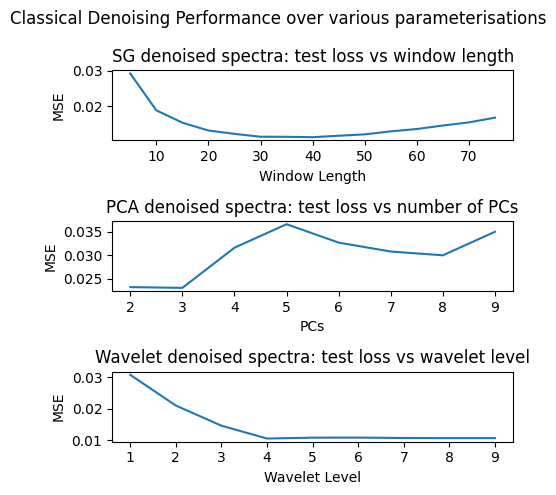

In [16]:
fig, ax = plt.subplots(3,1,figsize=(5, 5))

ax[0].plot(sg_params, SG_MSEs)
ax[0].set_xlabel('Window Length')
ax[0].set_ylabel('MSE')
ax[0].set_title('SG denoised spectra: test loss vs window length')
ax[1].plot(pc_params,PCA_MSEs)
ax[1].set_xlabel('PCs')
ax[1].set_ylabel('MSE')
ax[1].set_title('PCA denoised spectra: test loss vs number of PCs')
ax[2].plot(np.squeeze(wav_params),np.squeeze(wav_MSEs))
ax[2].set_xlabel('Wavelet Level')
ax[2].set_ylabel('MSE')
ax[2].set_title('Wavelet denoised spectra: test loss vs wavelet level')
fig.suptitle('Classical Denoising Performance over various parameterisations')
fig.tight_layout()

In [17]:
# plot example denoised spectra for all techniques

Text(0, 0.5, 'Normalised Raman intensity')

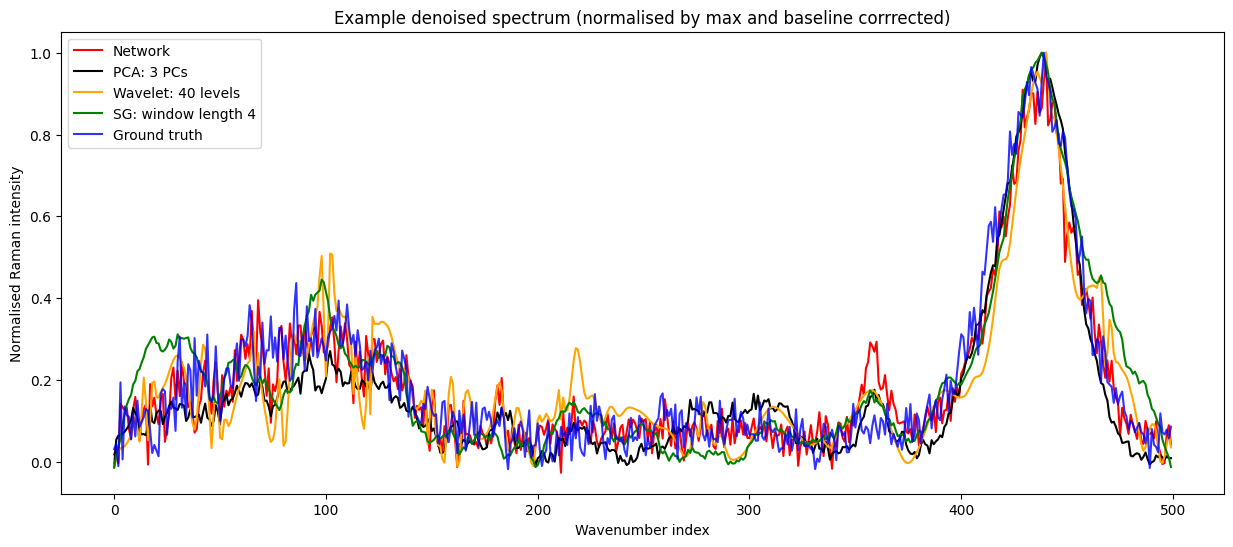

In [18]:
index=5000
fig, ax = plt.subplots(1,sharex=True,figsize=(15, 6))

#plt.plot(net_input[index],label='Input noisy')
ax.plot(np.squeeze(pred[index]), label='Network',color="red")
ax.plot(np.squeeze(pc[pc_index,index]), label='PCA: ' + str(int(pc_params[pc_index])) + ' PCs',color="black")
ax.plot(np.squeeze(wav[wav_index,index]), label='Wavelet: ' + str(int(sg_params[sg_index])) + ' levels',color="orange")
ax.plot(np.squeeze(sg[sg_index,index]), label='SG: window length ' + str(int(wav_params[wav_index])),color="green")
ax.plot(gt[index],label='Ground truth',alpha=0.8,color="blue")
ax.legend()
ax.set_title('Example denoised spectrum (normalised by max and baseline corrrected)')
ax.set_xlabel('Wavenumber index')
ax.set_ylabel('Normalised Raman intensity')

Text(0, 0.5, 'Normalised Raman intensity')

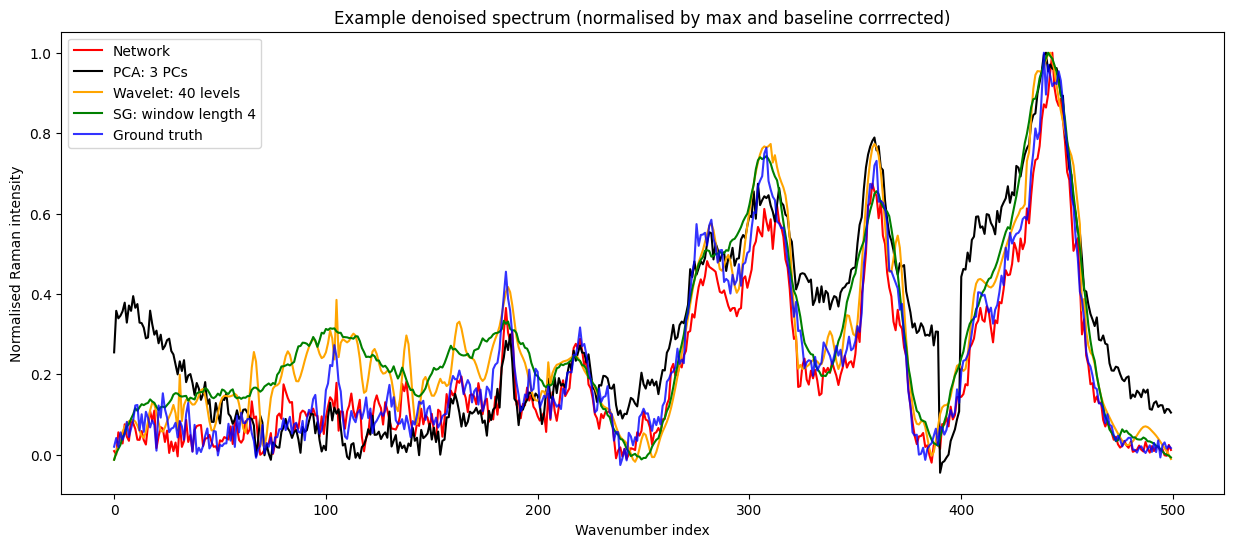

In [19]:
index=10000
fig, ax = plt.subplots(1,sharex=True,figsize=(15, 6))

#plt.plot(net_input[index],label='Input noisy')
ax.plot(np.squeeze(pred[index]), label='Network',color="red")
ax.plot(np.squeeze(pc[pc_index,index]), label='PCA: ' + str(int(pc_params[pc_index])) + ' PCs',color="black")
ax.plot(np.squeeze(wav[wav_index,index]), label='Wavelet: ' + str(int(sg_params[sg_index])) + ' levels',color="orange")
ax.plot(np.squeeze(sg[sg_index,index]), label='SG: window length ' + str(int(wav_params[wav_index])),color="green")
ax.plot(gt[index],label='Ground truth',alpha=0.8,color="blue")
ax.legend()
ax.set_title('Example denoised spectrum (normalised by max and baseline corrrected)')
ax.set_xlabel('Wavenumber index')
ax.set_ylabel('Normalised Raman intensity')